# COMP4026 Project Code

## !!!!!! Please DON'T execute the code of part 1 to part 4 if the all images is already preprocess and combined to one file !!!!!!!!!

# 1. Resize and Augmentate the image through horizontal flip

In [ ]:
def horizontal_flip(img, flag):
    if flag:
        return cv2.flip(img, 1)
    else:
        return img
    
    
width = 227
height = 227
dim = (width, height)

path = '/Users/emirince/Desktop/deneme/Normal/images/*.png'
directory = '/Users/emirince/Desktop/deneme/Normal/resized/*.png'
#directory = '/Users/emirince/Desktop/new data/Viral Pneumonia/'

for file in glob.glob(path):
    img = cv2.imread(file)
    
    cv2.imshow("Resized image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #flipped = horizontal_flip(resized, True)
    
    cv2.imshow("Resized image", flipped)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    

    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Gray image', img)
    basename = os.path.basename(file)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto
    cv2.imwrite(directory +  name + '_resized.png', resized)
    #cv2.imwrite(directory + basename + '_flipped.jpg' , flipped)

# 2. Sample 500 images from each raw data file

In [ ]:
# Define the source and destination directories
source_dir = '/Users/emirince/Desktop/dataset/Normal/flipped'
dest_dir = '/Users/emirince/Desktop/dataset/Normal/sample'

# Get a list of all the image filenames
image_filenames = os.listdir(source_dir)

# Shuffle the list of filenames
random.shuffle(image_filenames)

# Select the first 500 filenames
selected_filenames = image_filenames[:500]

# Copy the selected images to the destination directory
for filename in selected_filenames:
    src_path = os.path.join(source_dir, filename)
    dst_path = os.path.join(dest_dir, filename)
    shutil.copy(src_path, dst_path

# 3. Change the name of file (to add label)

In [33]:
import os
COVID_path="C:/Users/user/Desktop/year4 sem2/comp4026/Project/sample500/sample COVID"
Normal_path="C:/Users/user/Desktop/year4 sem2/comp4026/Project/sample500/sample Normal"
pna_path="C:/Users/user/Desktop/year4 sem2/comp4026/Project/sample500/sample Viral Pneumonia"

# Normal label = 0
for dirname in os.listdir(Normal_path):
    name_array = dirname.split(".")
    os.rename(Normal_path+"/"+dirname, Normal_path+"/"+name_array[0]+"_0.png")

# Covid label = 1
for dirname in os.listdir(COVID_path):
    name_array = dirname.split(".")
    os.rename(COVID_path+"/"+dirname, COVID_path+"/"+name_array[0]+"_1.png")

# pneumonia label = 2
for dirname in os.listdir(pna_path):
    name_array = dirname.split(".")
    os.rename(pna_path+"/"+dirname, pna_path+"/"+name_array[0]+"_2.png")

# 4. Copy images from 3 directories to 1 directory

In [38]:
import os
import shutil

source_folder = "C:/Users/user/Desktop/year4 sem2/comp4026/Project/sample500/sample Viral Pneumonia"
destination_folder = "C:/Users/user/Desktop/year4 sem2/comp4026/Project/sample500/combined_dataset"

# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + "/"+ file_name
    destination = destination_folder + "/"+ file_name
    # copy only files
    if os.path.isfile(source):
        shutil.copy(source, destination)

# 5. Shuffle the 1500 image dataset and splitting

In [1]:
import os
import shutil
import random

dataset_folder = "./src/sample500/combined_dataset"

image_filenames = os.listdir(dataset_folder)

random.shuffle(image_filenames)

train_filenames = image_filenames[:1200]   # training dataset need the first 1200 images
test_filenames = image_filenames[1200:]    # testing dataset don't need the first 1200 images

validation_filenames = train_filenames[1080:] # validation dataset need the last 120 images from training dataset
train_filenames = train_filenames[:1080] # reconstrict the training dataset, only need the first 1080 of original set

# 6. Convert the image to RGB matrix and build label array

In [2]:
from PIL import Image
import numpy as np

train_images = []
test_images = []
validation_images = []

train_labels = []
test_labels = []
validation_labels = []

# first change the image to rgb value and form a matrix with size 227 227 3
# then according to the filename, build a label numpy array
for filename in train_filenames:
    img = Image.open(dataset_folder+"/"+filename)
    img_array = np.array(img)
    train_images.append(img_array)
    
    name_array = filename.split("_")
    label_with_png = name_array[2]
    name_array = label_with_png.split(".")
    label = name_array[0]
    train_labels.append([int(label)])

for filename in test_filenames:
    img = Image.open(dataset_folder+"/"+filename)
    img_array = np.array(img)
    test_images.append(img_array)
    
    name_array = filename.split("_")
    label_with_png = name_array[2]
    name_array = label_with_png.split(".")
    label = name_array[0]
    test_labels.append([int(label)])

for filename in validation_filenames:
    img = Image.open(dataset_folder+"/"+filename)
    img_array = np.array(img)
    validation_images.append(img_array)
    
    name_array = filename.split("_")
    label_with_png = name_array[2]
    name_array = label_with_png.split(".")
    label = name_array[0]
    validation_labels.append([int(label)])

# 7. Change the dataset format to tensorflow dataframe

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [4]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

In [5]:
CLASS_NAMES= ['Normal', 'COVID', 'pneumonia']

pneumonia
COVID
COVID
Normal
pneumonia


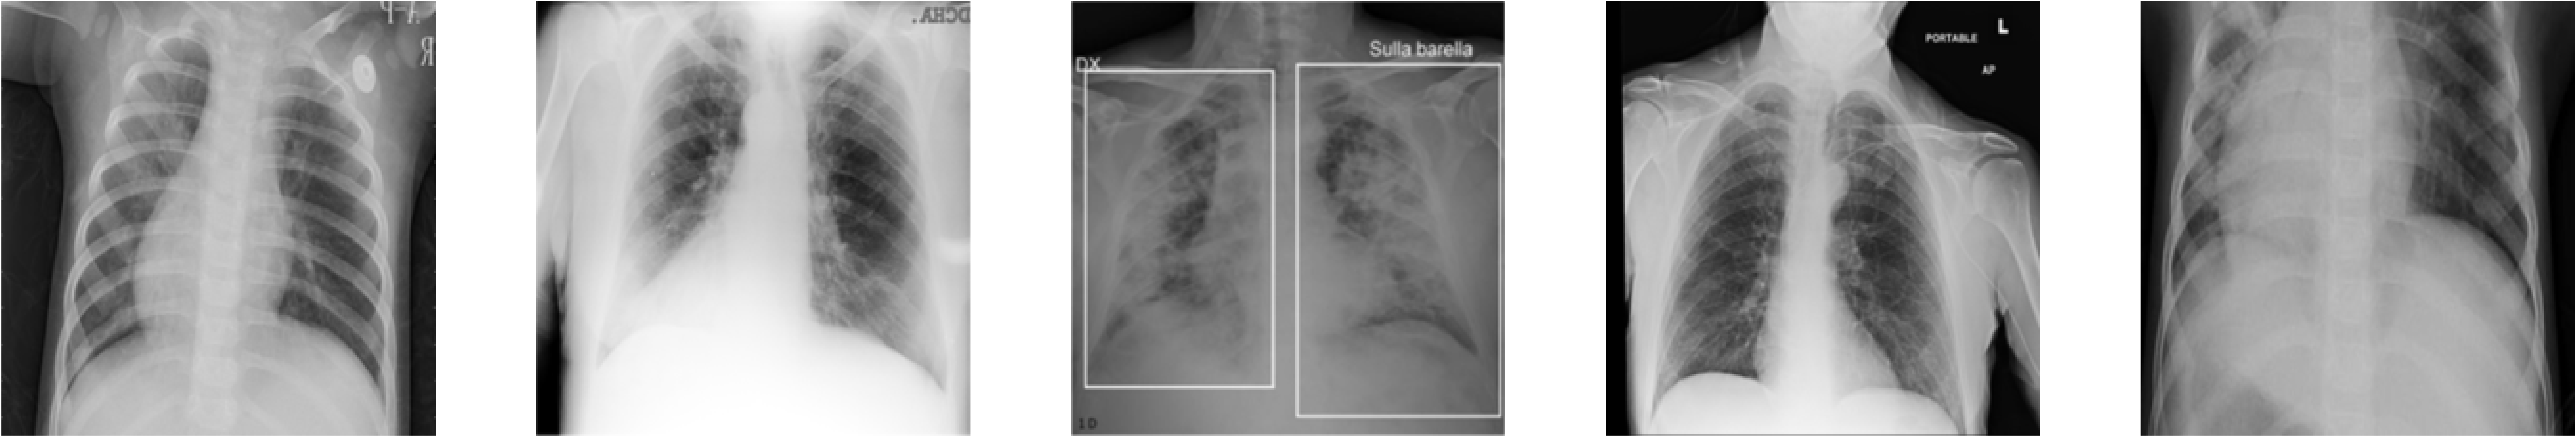

In [6]:
plt.figure(figsize=(227,227))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.axis('off')
    print(CLASS_NAMES[label.numpy()[0]])

In [7]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 1080
Test data size: 300
Validation data size: 120


In [8]:
# Normalize images to have a mean of 0 and standard deviation of 1
def process_images(image, label):
    image = tf.image.per_image_standardization(image)
    return image, label

In [9]:
train_ds = (train_ds
                  .map(process_images)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .batch(batch_size=32, drop_remainder=False))
validation_ds = (validation_ds
                  .map(process_images)
                  .batch(batch_size=32, drop_remainder=True))

# 8. Model Implementation

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [11]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
model.fit(train_ds,
          epochs=30,
          validation_data=validation_ds,
          validation_freq=1,
          callbacks=[tensorboard_cb])

Epoch 1/30
33/33 [==============================] - 29s 870ms/step - loss: 1.7878 - accuracy: 0.5483 - val_loss: 1.0131 - val_accuracy: 0.6042
Epoch 2/30
33/33 [==============================] - 30s 899ms/step - loss: 1.0398 - accuracy: 0.6799 - val_loss: 0.9364 - val_accuracy: 0.6562
Epoch 3/30
33/33 [==============================] - 30s 896ms/step - loss: 0.9018 - accuracy: 0.7055 - val_loss: 0.8423 - val_accuracy: 0.6354
Epoch 4/30
33/33 [==============================] - 29s 876ms/step - loss: 0.8029 - accuracy: 0.7358 - val_loss: 0.7499 - val_accuracy: 0.6875
Epoch 5/30
33/33 [==============================] - 29s 877ms/step - loss: 0.6338 - accuracy: 0.7680 - val_loss: 0.6461 - val_accuracy: 0.7500
Epoch 6/30
33/33 [==============================] - 29s 879ms/step - loss: 0.6461 - accuracy: 0.7708 - val_loss: 0.5612 - val_accuracy: 0.7812
Epoch 7/30
33/33 [==============================] - 29s 881ms/step - loss: 0.5345 - accuracy: 0.7964 - val_loss: 0.5120 - val_accuracy: 0.7604

# 9. Model Evaluation

In [14]:
model.evaluate(test_ds)

9/9 [==============================] - 1s 151ms/step - loss: 0.4116 - accuracy: 0.8333


[0.4116380512714386, 0.8333333134651184]

### Below instruction show how to get the training performance along epochs:

### open anaconda command prompt, go to the directory of this code file, then enter the following command:         


## tensorboard --logdir logs

### Then use the browser navigate to: http://localhost:6006 

In [64]:
demo_array = model.predict(test_ds)

In [65]:
pred = demo_array.argmax(axis=-1)

In [72]:
actual_labels = []
for label in test_labels:
    actual_labels.append(label[0])

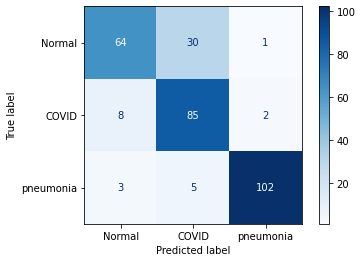

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

CLASS_NAMES= ['Normal', 'COVID', 'pneumonia']

cm = confusion_matrix(actual_labels, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(actual_labels, pred, target_names=CLASS_NAMES))

              precision    recall  f1-score   support

      Normal       0.85      0.67      0.75        95
       COVID       0.71      0.89      0.79        95
   pneumonia       0.97      0.93      0.95       110

    accuracy                           0.84       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.85      0.84      0.84       300



Normal Probability:0.00025725554
COVID Probability:0.00014387498
Pneumonia Probability:0.9995989
Actual Label: pneumonia


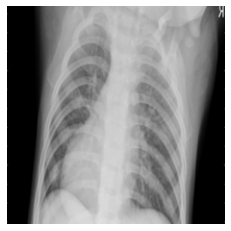

In [16]:
import matplotlib.image as mpimg

img = mpimg.imread(dataset_folder+"/"+test_filenames[0])
plt.imshow(img)
plt.axis('off')
print("Normal Probability:"+str(demo_array[0][0]))
print("COVID Probability:"+str(demo_array[0][1]))
print("Pneumonia Probability:"+str(demo_array[0][2]))
print("Actual Label: "+CLASS_NAMES[test_labels[0][0]])

Normal Probability:0.9313483
COVID Probability:0.06851769
Pneumonia Probability:0.00013405328
Actual Label: Normal


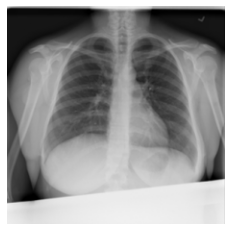

In [20]:
img = mpimg.imread(dataset_folder+"/"+test_filenames[4])
plt.imshow(img)
plt.axis('off')
print("Normal Probability:"+str(demo_array[4][0]))
print("COVID Probability:"+str(demo_array[4][1]))
print("Pneumonia Probability:"+str(demo_array[4][2]))
print("Actual Label: "+CLASS_NAMES[test_labels[4][0]])

Normal Probability:0.0005303427
COVID Probability:0.9993591
Pneumonia Probability:0.000110564106
Actual Label: COVID


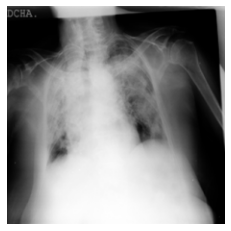

In [21]:
img = mpimg.imread(dataset_folder+"/"+test_filenames[8])
plt.imshow(img)
plt.axis('off')
print("Normal Probability:"+str(demo_array[8][0]))
print("COVID Probability:"+str(demo_array[8][1]))
print("Pneumonia Probability:"+str(demo_array[8][2]))
print("Actual Label: "+CLASS_NAMES[test_labels[8][0]])